# Bibliotecas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Abertura dos dados

In [ ]:
treino = pd.read_excel('/content/drive/MyDrive/Mestrado/Resultados.xlsx', sheet_name = 'Dados_Treino')
teste = pd.read_excel('/content/drive/MyDrive/Mestrado/Resultados.xlsx', sheet_name = 'Dados_Teste')
dados = pd.read_excel('/content/drive/MyDrive/Mestrado/Resultados.xlsx', sheet_name = 'Dados')

In [ ]:
dados_ridge_treino = pd.read_excel('/content/drive/MyDrive/Mestrado/Resultados.xlsx', sheet_name = 'RidgeLine_Treino')
dados_ridge_teste = pd.read_excel('/content/drive/MyDrive/Mestrado/Resultados.xlsx', sheet_name = 'RidgeLine_Teste')
dados_ridge = pd.read_excel('/content/drive/MyDrive/Mestrado/Resultados.xlsx', sheet_name = 'Todos_RidgeLine')

In [ ]:
def erro_sigma(previsao, gas):
    N = len(previsao)
    k_p = np.log10(previsao)
    k_g = np.log10(gas)
    N = len(k_p)
    soma = np.sum((k_p-k_g)**2)
    raiz = np.sqrt(soma/N)
    sigma = 10**(raiz)
    return sigma

# Visualização dos RidgeLine

In [ ]:
def VisualizarRidgeLineDissertacao2(dados_totais, dados_ridge, permeabilidade_ensemble, permeabilidade_sdr, permeabilidade_han, modelo):
    for i in np.arange(len(dados_ridge['Poço'].unique())):
        df_copia = dados_ridge.copy()

        df_dados = dados_totais.loc[dados_totais['Poço'] == dados_totais['Poço'].unique()[i]].reset_index().drop('index', axis = 1)
        dados_plot = df_copia.loc[df_copia['Poço'] == df_copia['Poço'].unique()[i]].reset_index().drop('index', axis = 1)

        array = np.arange(len(dados_plot.Amostra.unique()))
        fig = plt.figure(figsize = (2,10))
        cores = [ 'mediumorchid', 'mediumseagreen', 'cornflowerblue', 'indianred', 'y', 'k', 'w']

        for j in np.arange(len(array)):
            x = dados_plot['Tempo'][j*128:j*128+128]
            y = dados_plot['T2'][j*128:j*128+128]
            cor = dados_plot['Litofacie'][j*128]
            poço = dados_plot['Poço'][0]
            #espacamento = j*-0.02                   # Espaçamento para poços com muitos dados
            espacamento = j*-0.2/len(array)        # Espaçamento para poços com poucos dados

            if j == array[0]:
                ax = str(array[j])
                ax = fig.add_axes([0, espacamento, 1, 0.05])
                ax.fill(x, y, alpha = 0.7, color = cores[cor], linewidth=2)
                ax.set_xscale('log')
                ax.set_frame_on(False)
                ax.get_yaxis().set_visible(False)
                ax.get_xaxis().set_visible(False)
                secx = ax.secondary_xaxis(1.2)
                secx.set_xlabel('ms')
                secx.set_xticks([0.01, 1, 100, 10000])
                plt.title(f'Pseudo-pore size \n distribution \n Poço {poço}', fontsize=12, loc = 'center', y = 3)
            else:
                ax = str(array[j])
                ax = fig.add_axes([0, espacamento, 1, 0.05])
                ax.fill(x, y, alpha = 0.7, color = cores[cor], linewidth=2)
                ax.set_xscale('log')
                ax.set_frame_on(False)
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)

        tam = -1*espacamento+0.01
        ax = fig.add_axes([-4.8, espacamento, 1, tam])        # Porosidade Gás
        ax1 = fig.add_axes([-4.8, espacamento, 1, tam])       # Porosidade RMN
        ax2 = fig.add_axes([-3.6, espacamento, 1, tam])       # Permeabilidade Gás
        ax3 = fig.add_axes([-3.6, espacamento, 1, tam])       # Permeabilidade Prevista Ensemble
        ax4 = fig.add_axes([-2.4, espacamento, 1, tam])       # Permeabilidade Gás
        ax5 = fig.add_axes([-2.4, espacamento, 1, tam])       # Permeabilidade Prevista SDR
        ax6 = fig.add_axes([-1.2, espacamento, 1, tam])       # Permeabilidade Gás
        ax7 = fig.add_axes([-1.2, espacamento, 1, tam])       # Permeabilidade Prevista Han

        poço = df_dados['Poço'][0]

        ax.plot(df_dados['Porosidade Gas']*100, df_dados['Amostra'], marker='o', color = 'r',)
        ax.set_frame_on(False)
        ax.get_yaxis().set_visible(False)
        ax.get_xaxis().set_visible(False)
        ax.invert_yaxis()
        secx = ax.secondary_xaxis(1.25)
        ax.set_xlim(0, 40)
        secx.set_xticks([0, 10, 20, 30, 40])
        secx.set_xlabel('Gas Porosity (%)', color = 'r')

        ax1.plot(df_dados['Porosidade RMN']*100, df_dados['Amostra'], marker='o', color = 'k')
        ax1.set_frame_on(False)
        ax1.get_xaxis().set_visible(False)
        ax1.get_yaxis().set_visible(False)
        ax1.invert_yaxis()
        secx1 = ax1.secondary_xaxis(1.55)
        ax1.set_xlim(0, 40)
        secx1.set_xticks([0, 10, 20, 30, 40])
        secx1.set_xlabel('NMR Porosity (%)', color = 'k')
        ax1.set_title(f'Gas and NMR Porosity \n\n Well {poço}', fontsize=12, loc = 'center', y = 1.9)

        ax2.plot(df_dados['Permeabilidade Gas'], df_dados['Amostra'], marker='p', color = 'r')
        ax2.set_frame_on(False)
        ax2.set_xscale('log')
        ax2.invert_yaxis()
        ax2.get_yaxis().set_visible(False)
        ax2.get_xaxis().set_visible(False)
        secx2 = ax2.secondary_xaxis(1.25)
        ax2.set_xlim(0.001, 1000)
        secx2.set_xticks([0.001, 0.01, 0.1, 1, 10, 100, 1000])
        secx2.set_xlabel('Gas Permeability (mD)', color = 'r')


        ax3.plot(df_dados[permeabilidade_ensemble], df_dados['Amostra'], marker='x', color = 'b')
        ax3.set_frame_on(False)
        ax3.set_xscale('log')
        ax3.invert_yaxis()
        ax3.get_yaxis().set_visible(False)
        ax3.get_xaxis().set_visible(False)
        secx3 = ax3.secondary_xaxis(1.55)
        ax3.set_xlim(0.001, 1000)
        secx3.set_xticks([0.001, 0.01, 0.1, 1, 10, 100, 1000])
        secx3.set_xlabel(f'Permeability \n {permeabilidade_ensemble} (mD)', color = 'b')
        ax3.set_title(f'Permeability prediction \n\n Well {poço}', fontsize=12, loc = 'center', y = 1.9)


        ax4.plot(df_dados['Permeabilidade Gas'], df_dados['Amostra'], marker='p', color = 'r')
        ax4.set_frame_on(False)
        ax4.set_xscale('log')
        ax4.invert_yaxis()
        ax4.get_yaxis().set_visible(False)
        ax4.get_xaxis().set_visible(False)
        secx4 = ax4.secondary_xaxis(1.25)
        ax4.set_xlim(0.001, 1000)
        secx4.set_xticks([0.001, 0.01, 0.1, 1, 10, 100, 1000])
        secx4.set_xlabel('Gas Permeability (mD)', color = 'r')


        ax5.plot(df_dados[permeabilidade_sdr], df_dados['Amostra'], marker='x', color = 'b')
        ax5.set_frame_on(False)
        ax5.set_xscale('log')
        ax5.invert_yaxis()
        ax5.get_yaxis().set_visible(False)
        ax5.get_xaxis().set_visible(False)
        secx5 = ax5.secondary_xaxis(1.55)
        ax5.set_xlim(0.001, 1000)
        secx5.set_xticks([0.001, 0.01, 0.1, 1, 10, 100, 1000])
        secx5.set_xlabel(f'Permeability \n {permeabilidade_sdr} (mD)', color = 'b')
        ax5.set_title(f'Permeability prediction \n\n Well {poço}', fontsize=12, loc = 'center', y = 1.9)

        ax6.plot(df_dados['Permeabilidade Gas'], df_dados['Amostra'], marker='p', color = 'r')
        ax6.set_frame_on(False)
        ax6.set_xscale('log')
        ax6.invert_yaxis()
        ax6.get_yaxis().set_visible(False)
        ax6.get_xaxis().set_visible(False)
        secx6 = ax6.secondary_xaxis(1.25)
        ax6.set_xlim(0.001, 1000)
        secx6.set_xticks([0.001, 0.01, 0.1, 1, 10, 100, 1000])
        secx6.set_xlabel('Gas Permeability (mD)', color = 'r')
        ax6.set_title(f'Permeability prediction \n\n Well {poço}', fontsize=12, loc = 'center', y = 1.9)

        ax7.plot(df_dados[permeabilidade_han], df_dados['Amostra'], marker='x', color = 'b')
        ax7.set_frame_on(False)
        ax7.set_xscale('log')
        ax7.invert_yaxis()
        ax7.get_yaxis().set_visible(False)
        ax7.get_xaxis().set_visible(False)
        secx7 = ax7.secondary_xaxis(1.55)
        ax7.set_xlim(0.001, 1000)
        secx7.set_xticks([0.001, 0.01, 0.1, 1, 10, 100, 1000])
        secx7.set_xlabel(f'Permeability \n {permeabilidade_han} (mD)', color = 'b')

        plt.show()

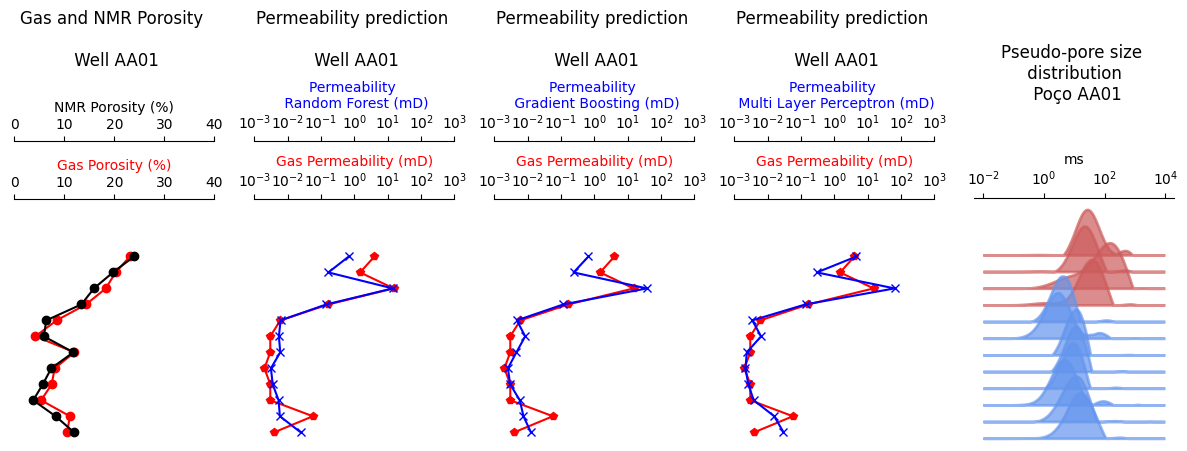

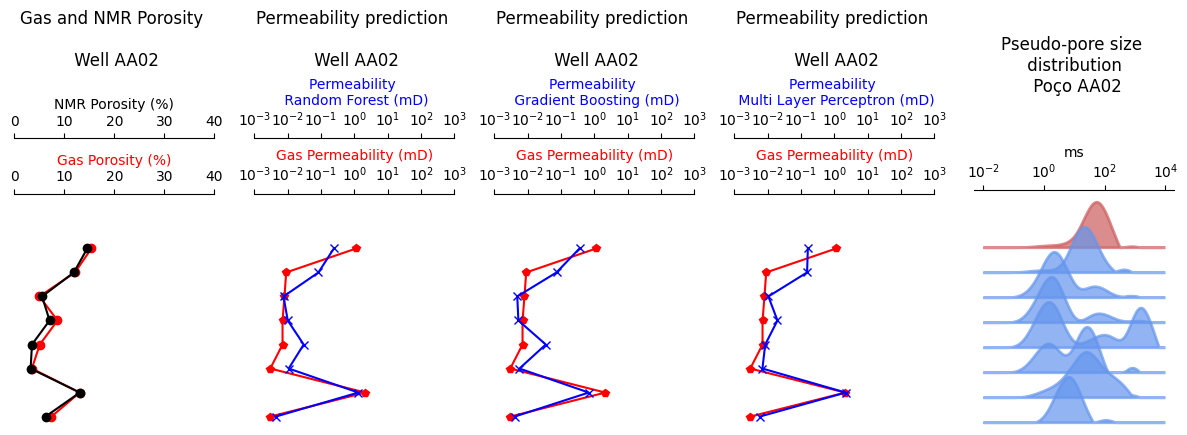

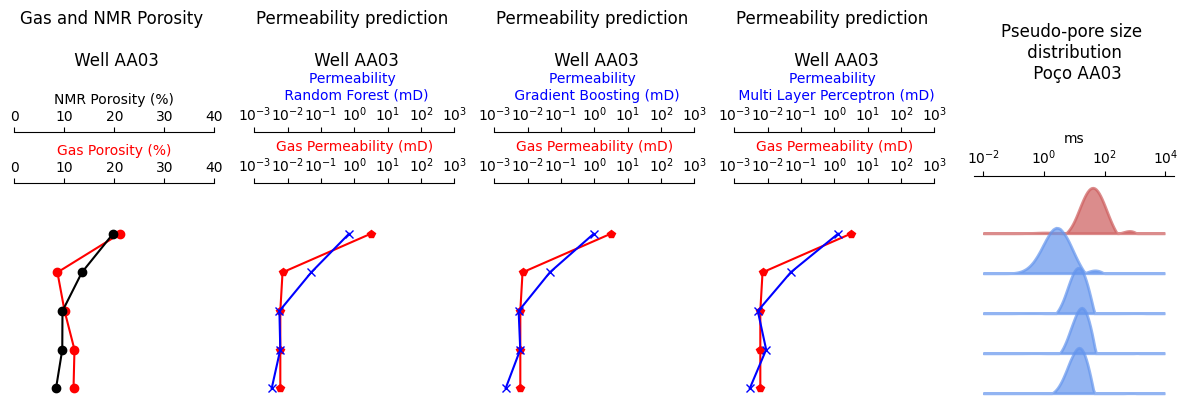

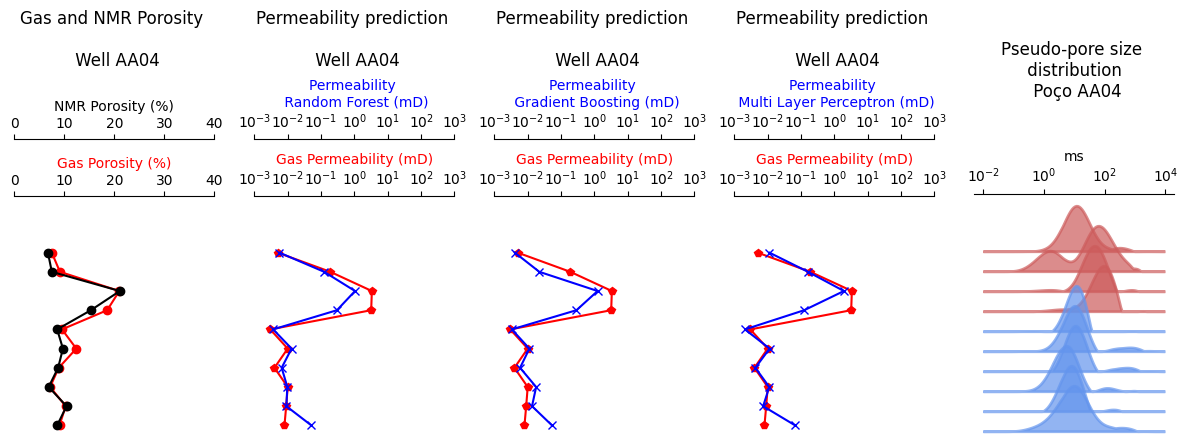

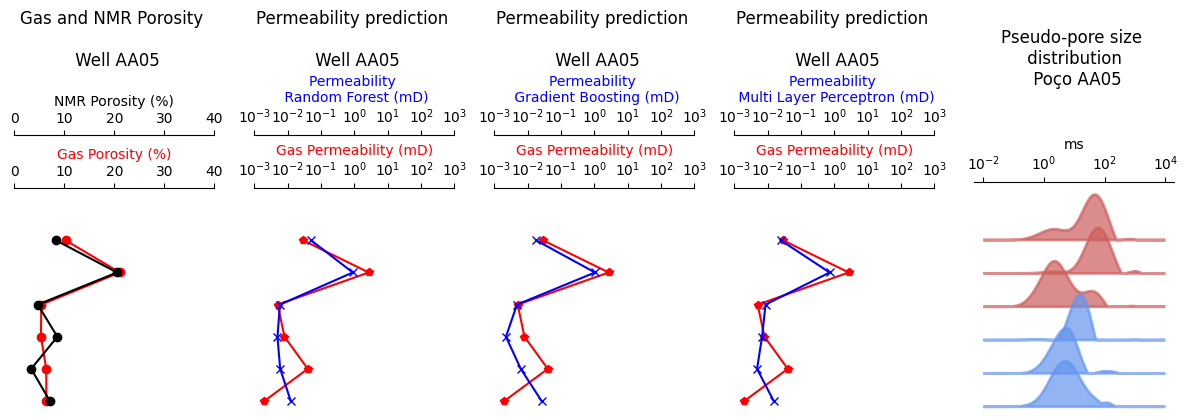

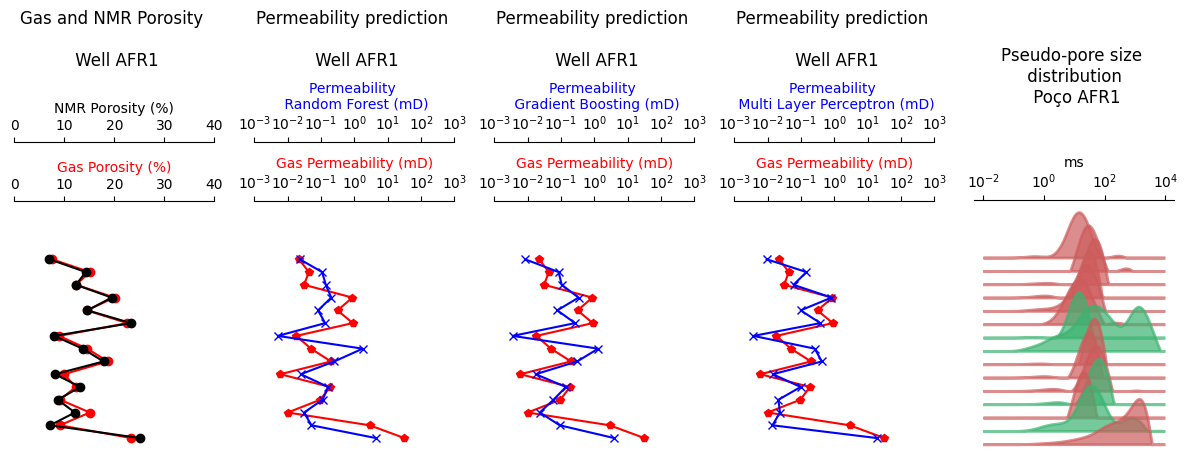

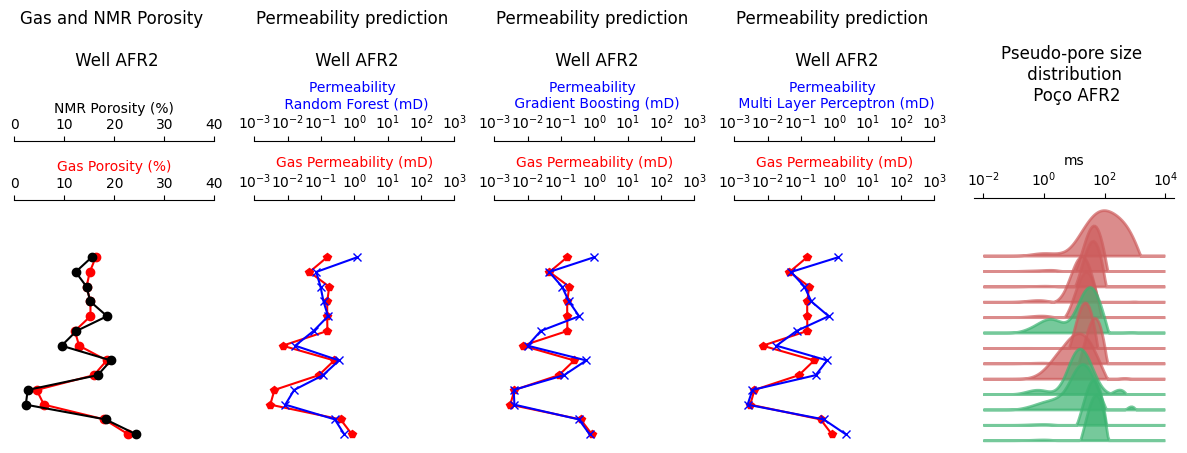

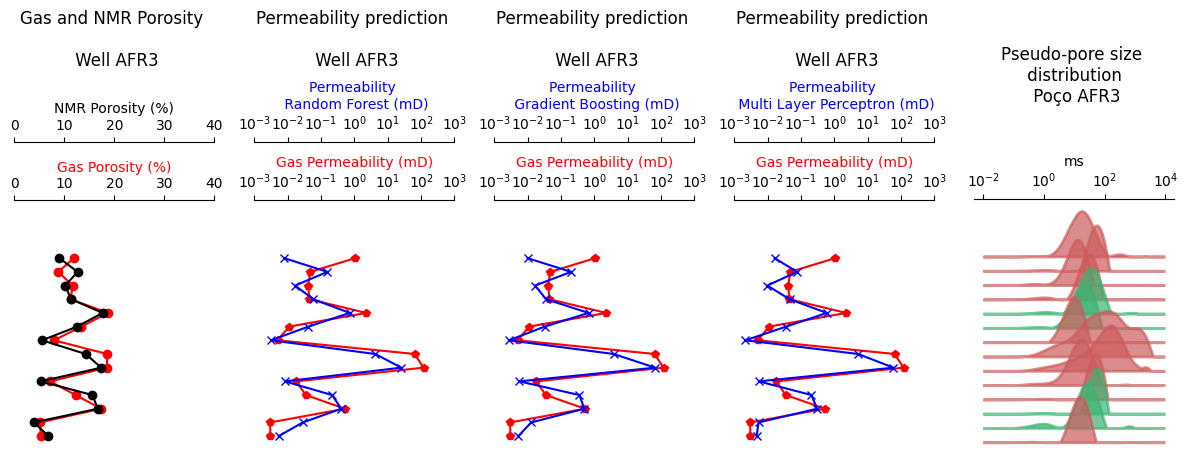

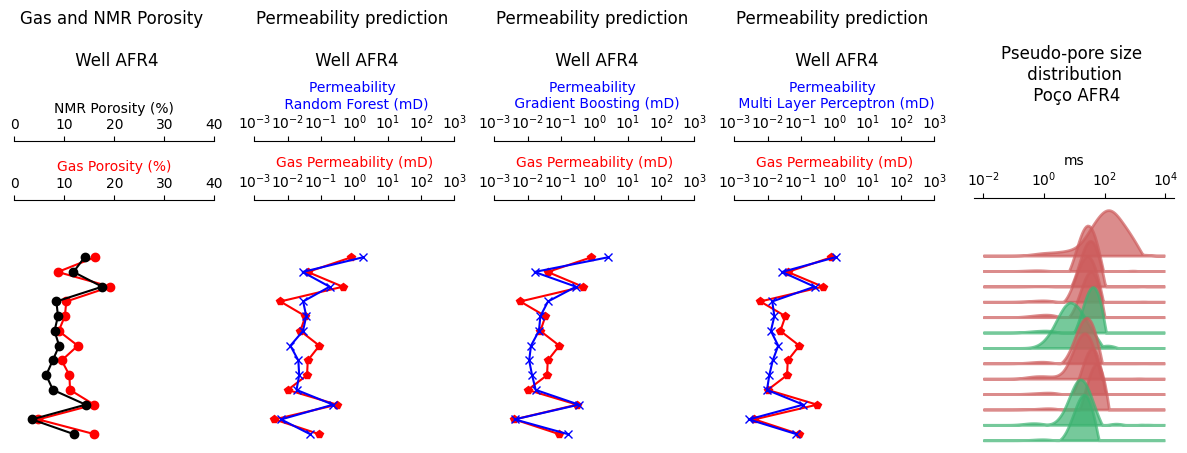

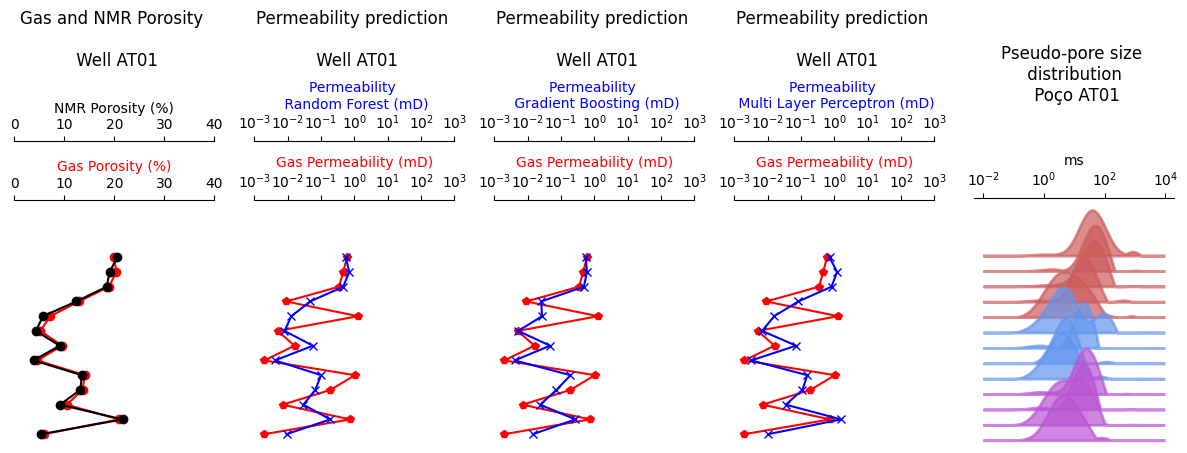

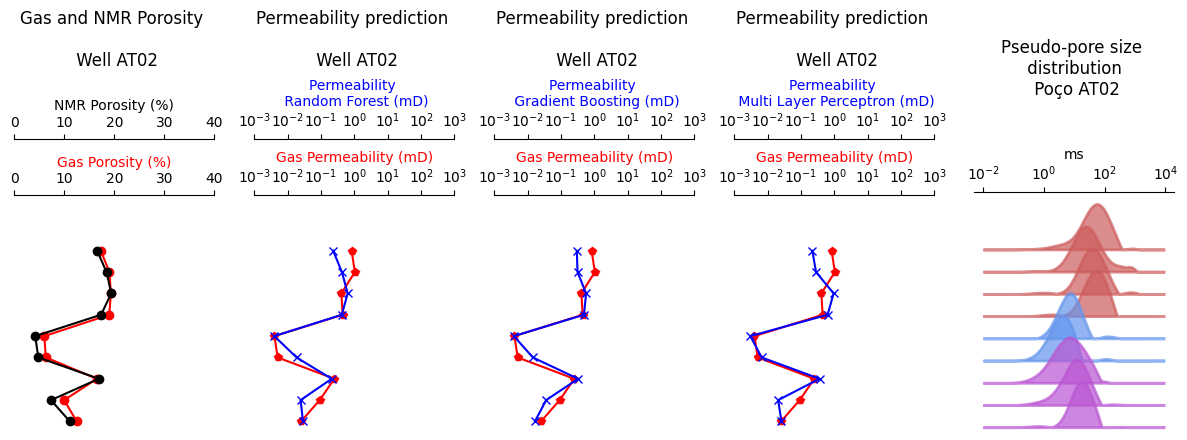

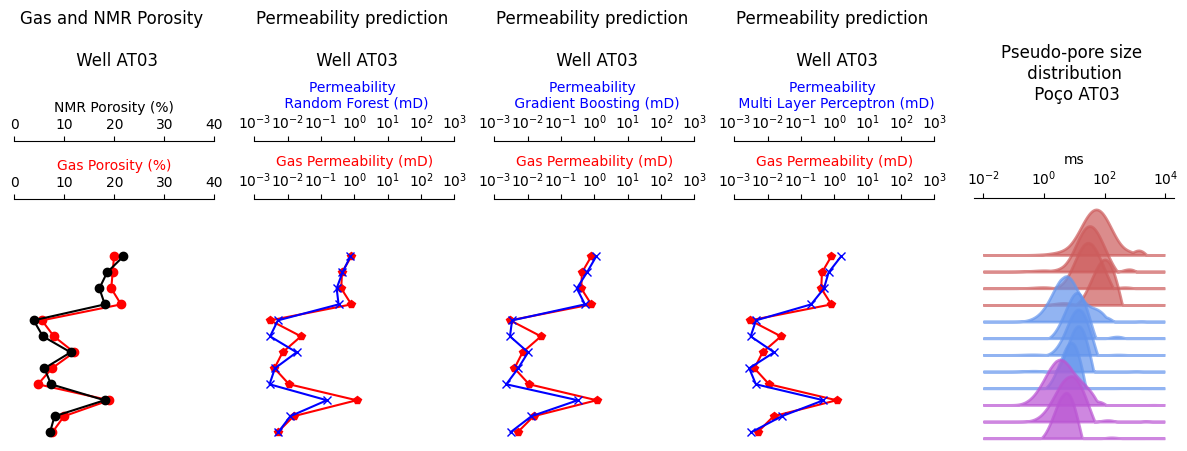

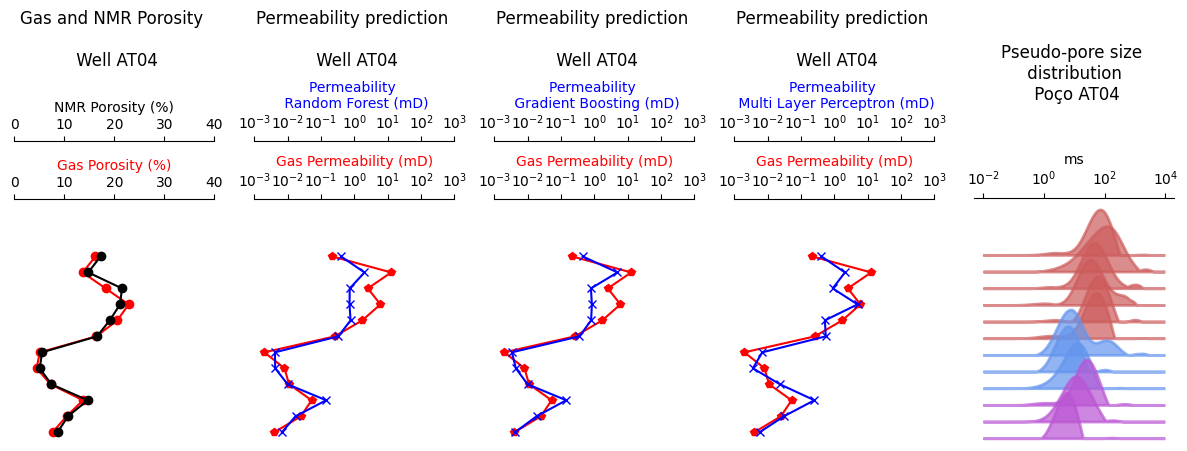

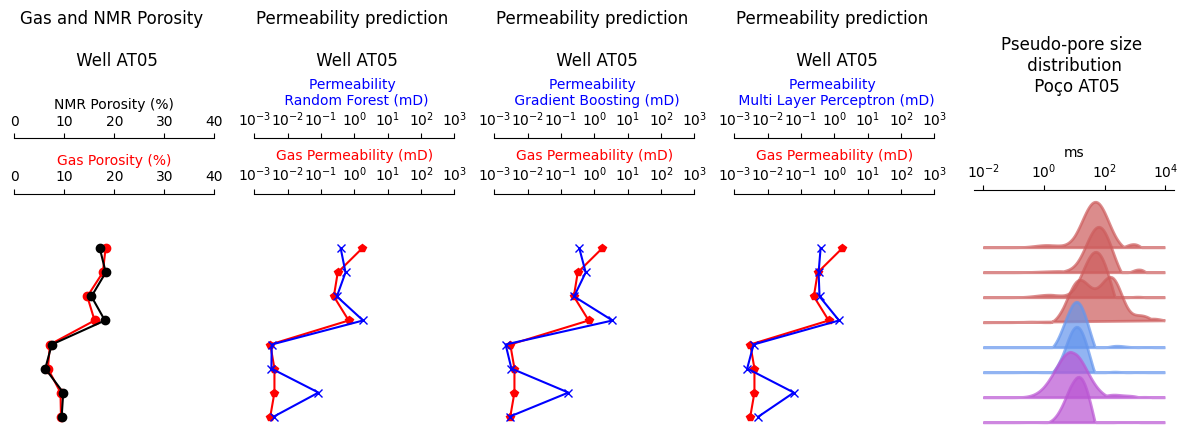

In [ ]:
VisualizarRidgeLineDissertacao2(dados_totais = teste,
                               dados_ridge = dados_ridge_teste,
                               permeabilidade_ensemble = 'Random Forest',
                               permeabilidade_sdr = 'Gradient Boosting',
                               permeabilidade_han = 'Multi Layer Perceptron',
                               modelo = '')

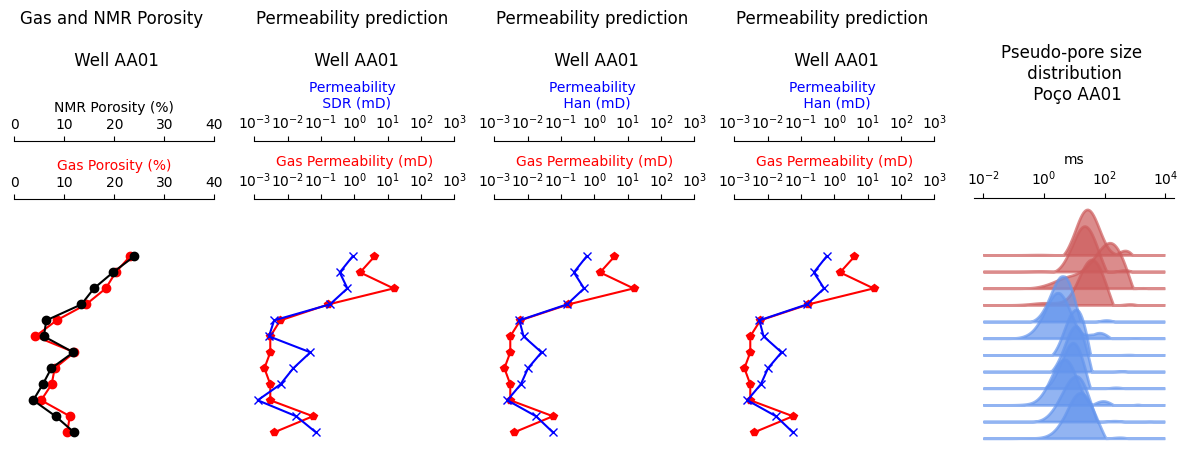

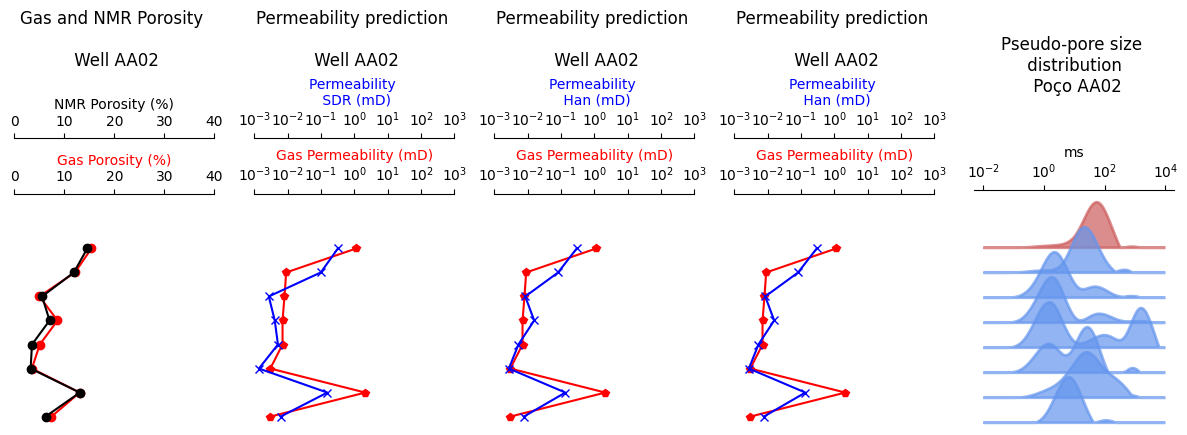

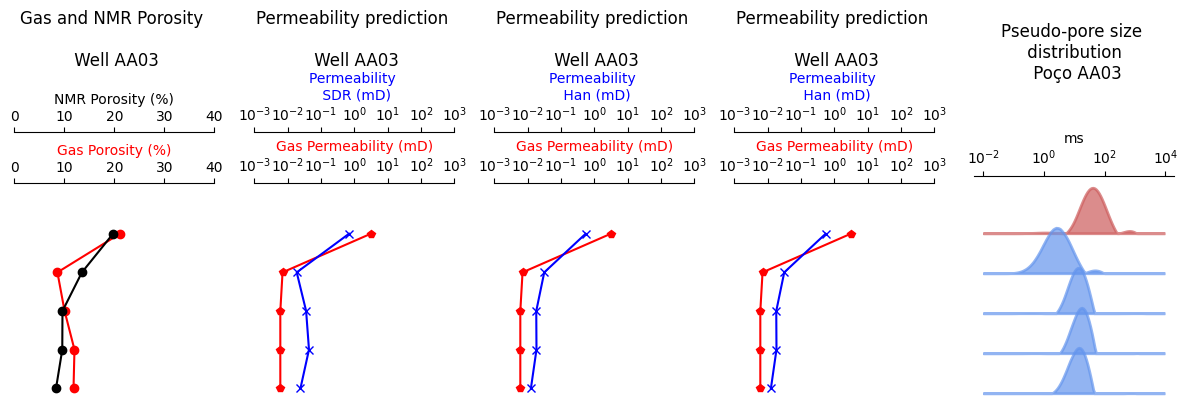

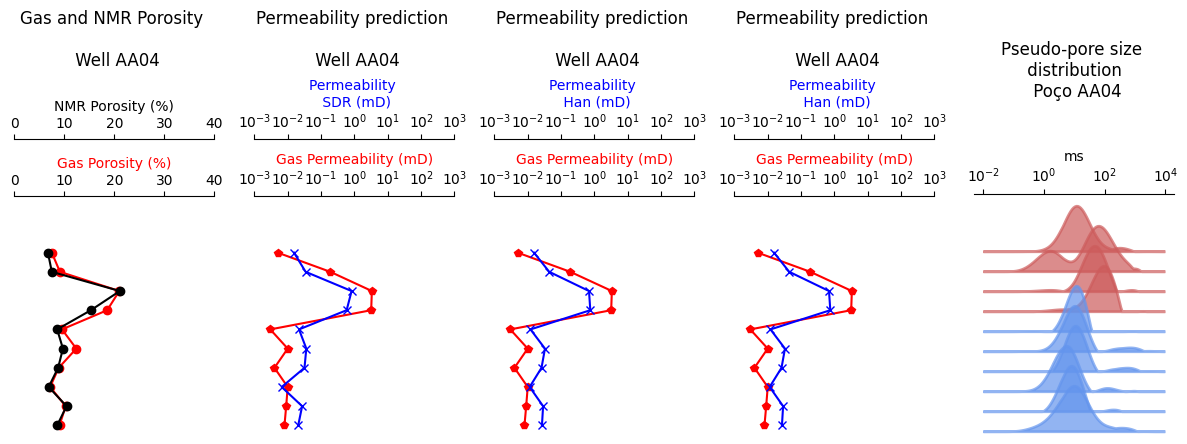

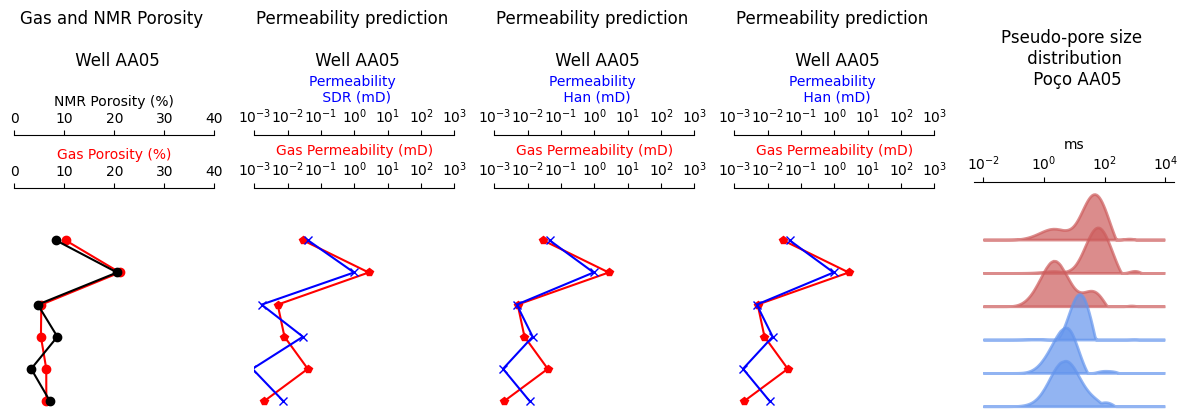

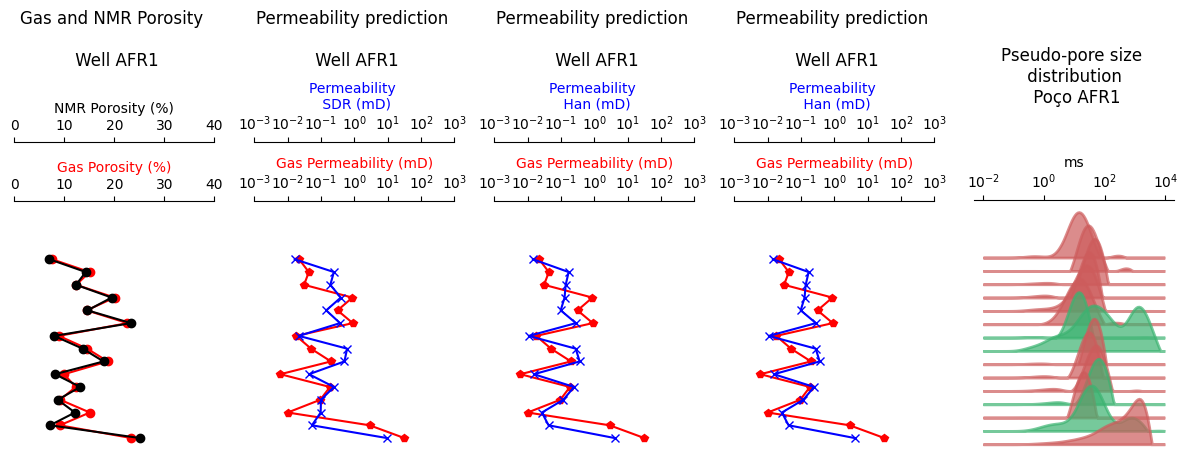

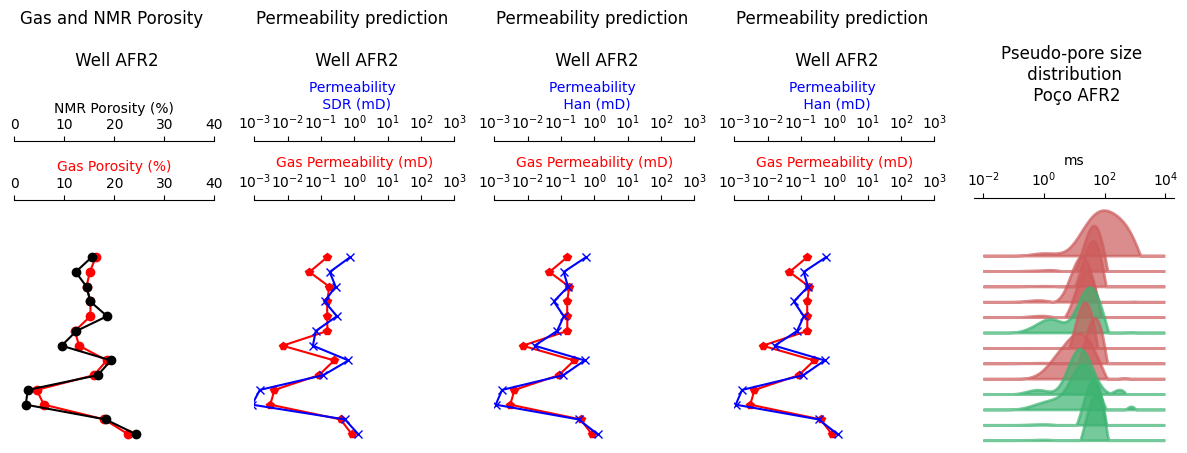

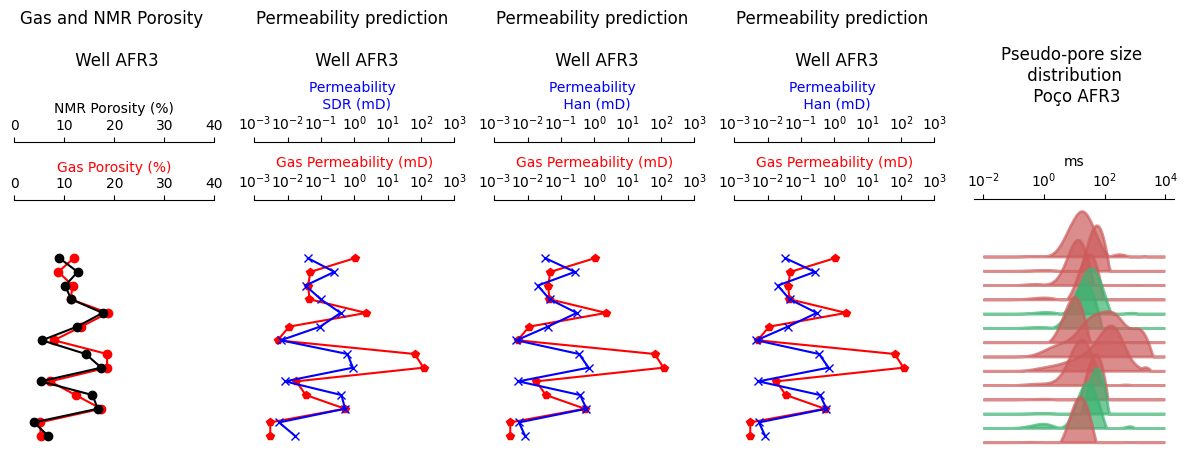

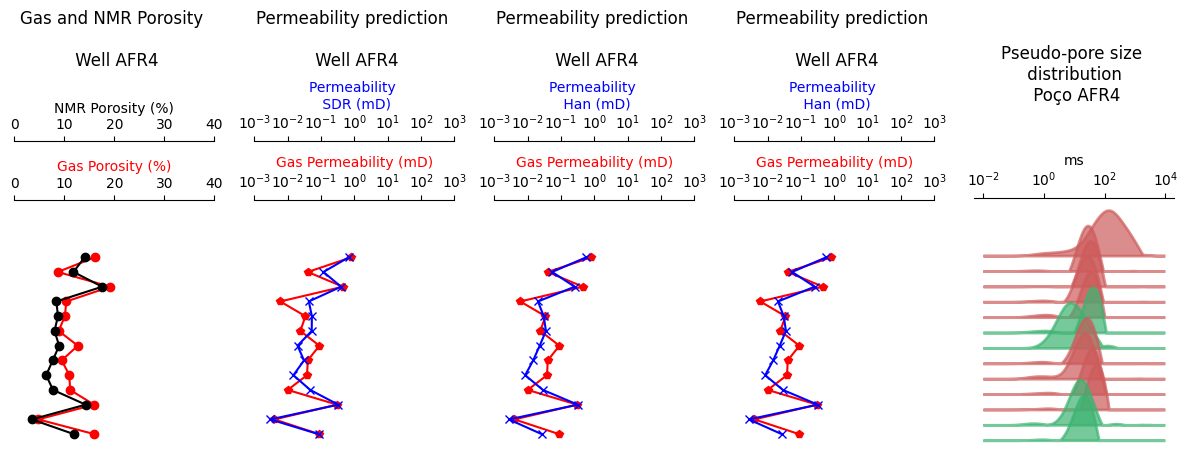

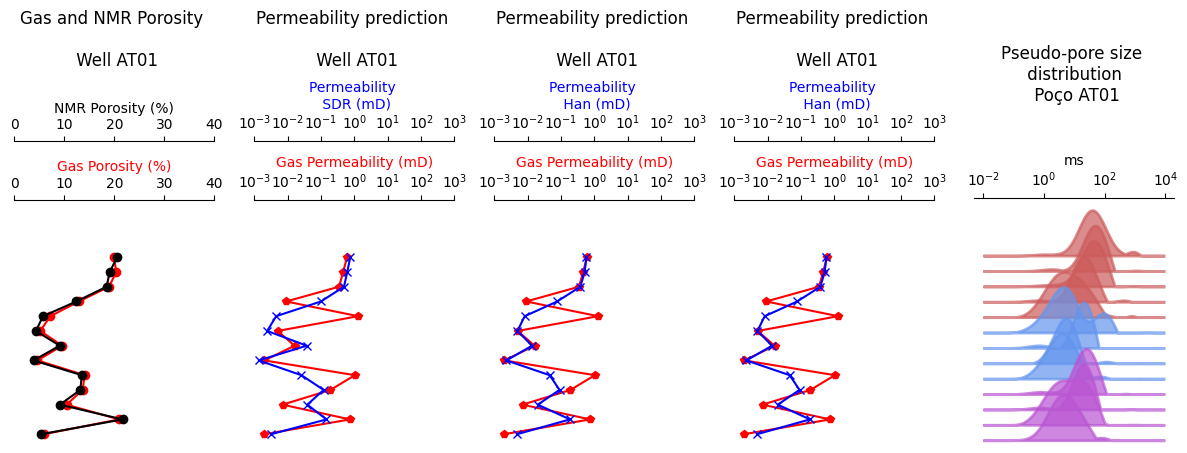

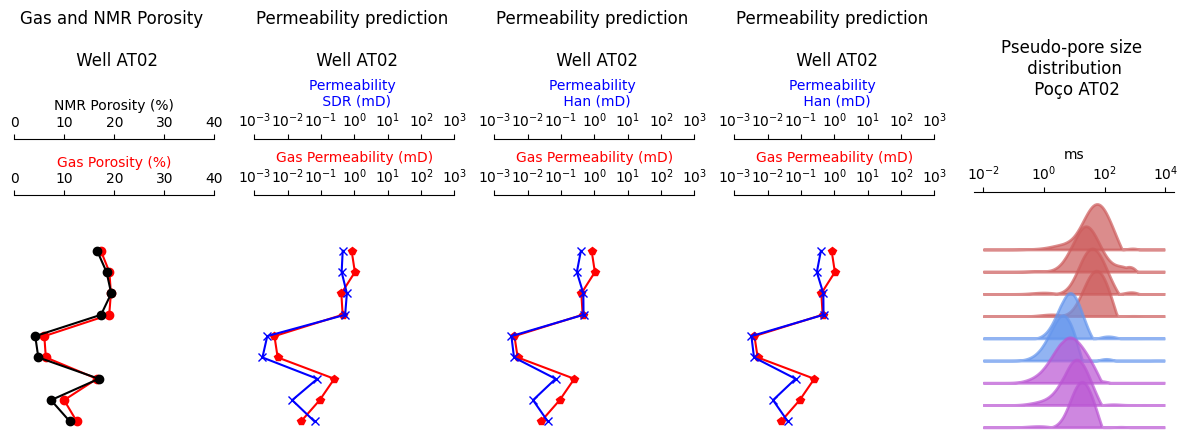

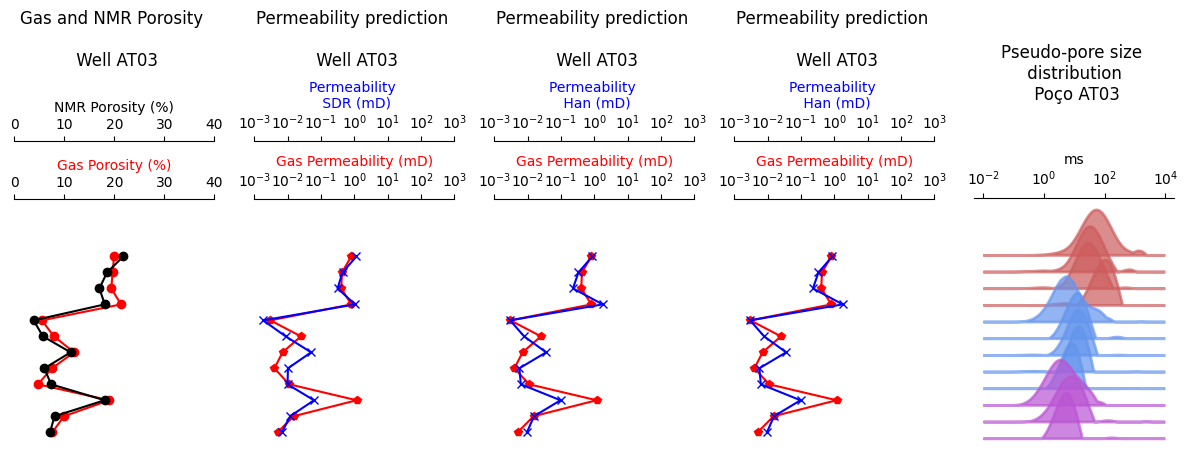

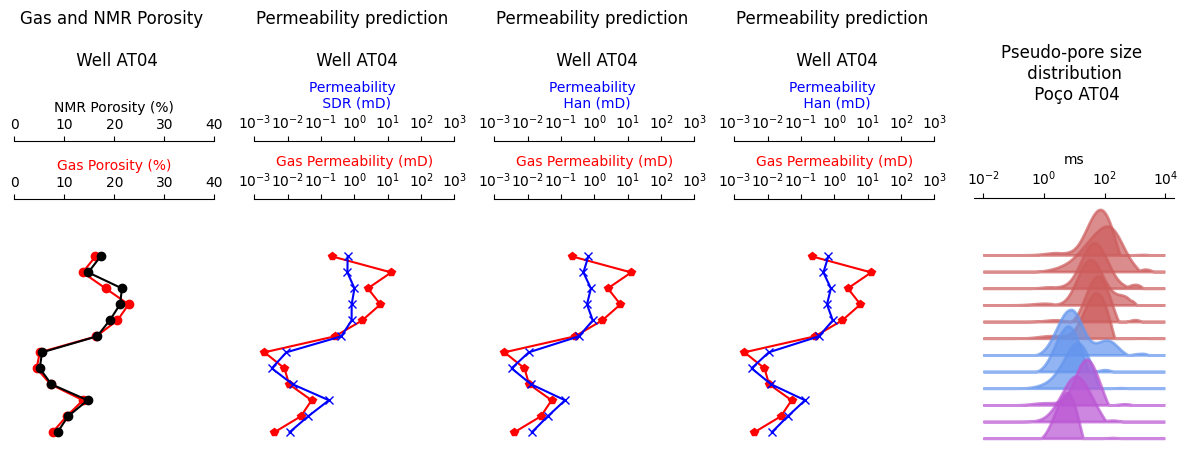

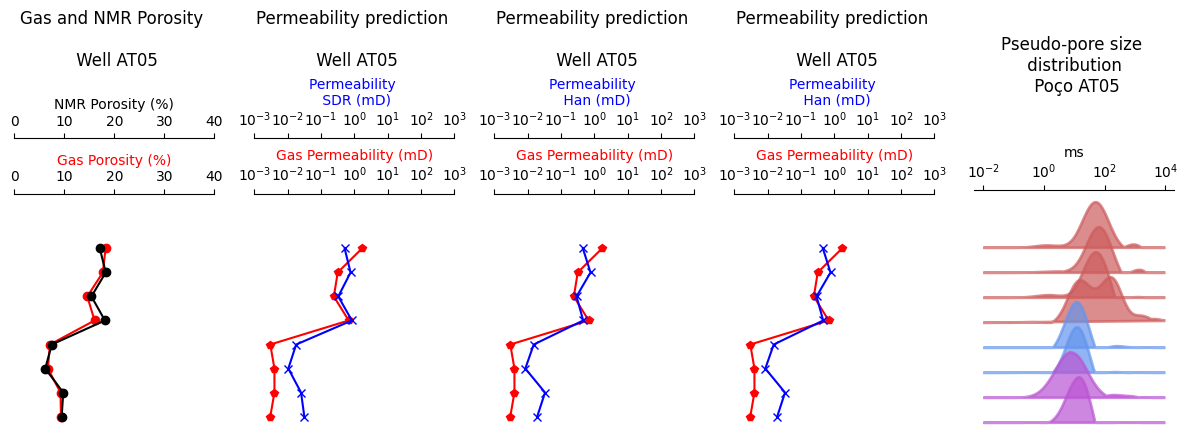

In [ ]:
VisualizarRidgeLineDissertacao2(dados_totais = teste,
                               dados_ridge = dados_ridge_teste,
                               permeabilidade_ensemble = 'SDR',
                               permeabilidade_sdr = 'Han',
                               permeabilidade_han = 'Han',
                               modelo = '')

In [ ]:
VisualizarRidgeLineDissertacao2(dados_totais = treino,
                               dados_ridge = dados_ridge_treino,
                               permeabilidade_ensemble = 'Random Forest',
                               permeabilidade_sdr = 'SDR',
                               permeabilidade_han = 'Han',
                               modelo = 'Treino')

In [ ]:
VisualizarRidgeLineDissertacao2(dados_totais = teste,
                               dados_ridge = dados_ridge_teste,
                               permeabilidade_ensemble = 'Random Forest',
                               permeabilidade_sdr = 'SDR',
                               permeabilidade_han = 'Han',
                               modelo = 'Teste')